## **Análise da correlação entre Juros básicos e inflação no Brasil ao longo do tempo**

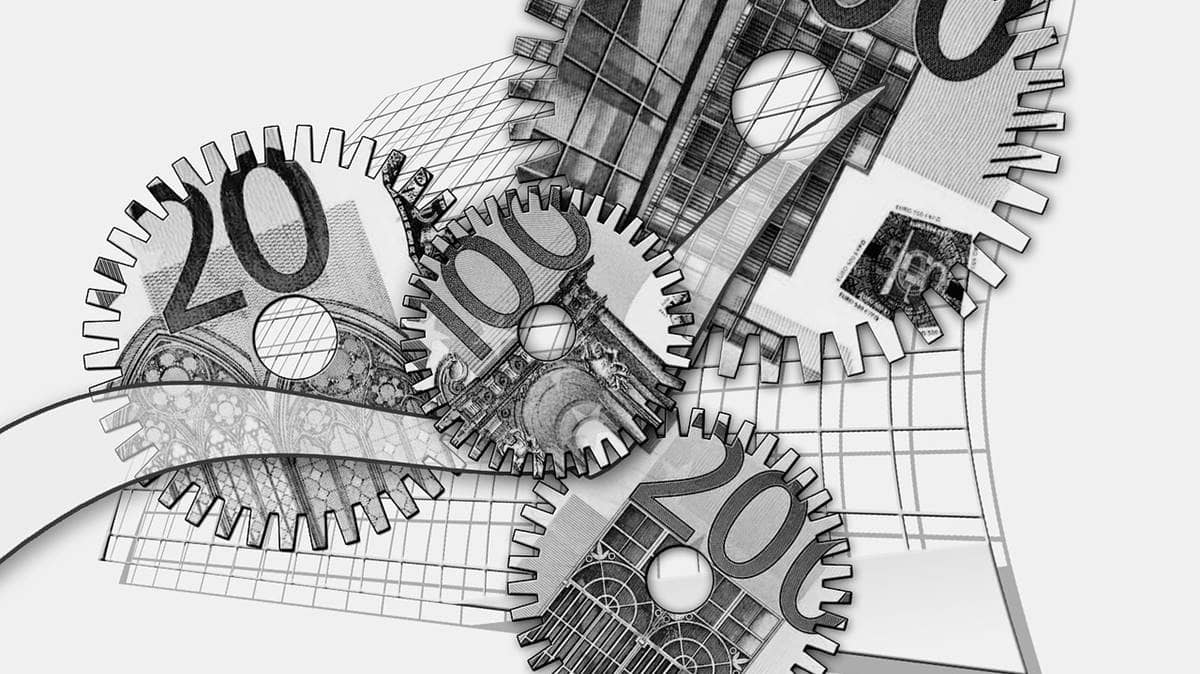

### 📉Interpretação dos Resultados Correlação no Brasil:
### - Brasil: Nos primeiros meses (0 a 3 ), as correlações variam em torno de valores baixos, geralmente negativos, com uma leve tendência positiva no mês 3.
### Mudança de Direção: no mês 7 tem-se uma correlação positiva significativa (0.067). Um desavisado poderia interpretar isso como se a Selic a pós algum tivesse um efeito completamente oposto ao que se propunha, mas ao que parece o efeito da Selic cai e outros fatores parecem serem mais importantes para decidirem para onde a inflação vai nesse período.
### Oscilações:A partir do 11° mês, as correlações passam a ser tornarem mais fortes. O pico de queda no caso brasileiro entre 2000 e 2024, ocorre no 18° mês.
### Tendência Geral no Caso braileiro: A correlação parece oscilar bastante, sugerindo que a relação entre inflação e taxa de juros é complexa e pode ser influenciada por vários fatores ao longo do tempo. O efeito esperado da Selic na inflação parece ocorrer mais a médio prazo na economia brasileira.

## Conclusão:
### - A política monetária não tende a ter efeito máximo no curtíssimo prazo. Ela tende a ter efeitos máximo mais a médio/longo-prazo (entre 6 até 24 meses)
### - A economia brasileira tem dificuldade de absorver a política monetária. Isso indica que a economia brasileira de fato parece ter uma baixa sensibilidade à política de juros. Esse problema pode decorrer de deficiências dos mecanismos de transmissão da política monetária, nessa economia.

## 💡Insight:
### - Deve-se estudar mais os dados e combinar isso com a teoria econômica, de forma a se buscar quais os mecanismos de transmissão da política monetária que estão deficientes e como consertar isso.



---



## Caso dos EUA:
### Efeito claro e de acordo com esperado: A inflação começa a responder a um aumento da Taxa básica de juros nos EUA a partir do segundo mês e permanece assim durante um longo período.
### Pico: o pico de queda da inflação após um aumento da Selic parece ocorrer lá pelo 10° mês após o aumento da taxa básica. O efeito inverso da taxa básica de juros na inflação no caso dos EUA parece ter pico máximo entre o 5° e o 15° mês.



---



## Base de dados:
### Inflação USA:
-  https://www.usinflationcalculator.com/inflation/current-inflation-rates/

### Selic:
-  https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

### Taxa básica de juros americano:
- https://fred.stlouisfed.org/series/FEDFUNDS

### Taxa de inflação do Brasil:
- https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html





---



---



### Carrego as bibliotecas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go

### Carrego a biblioteca do BCB para pegar os dados da Selic:

In [2]:
# Instalo a biblioteca que me dá acesso aos dados do Banco Central do Brasil
!pip install python-bcb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s eta 0:00:00


In [3]:
from bcb import sgs

### Função para obter os dados da selic

In [4]:
def obter_selic():
    codigo = 432  # Código da série para Taxa Selic - Mensal
    selic_data = sgs.get(codigo, start='2000-01-01', end='2024-07-01')

    # Verifica se a coluna 'dataFim' está presente e, se estiver, a remove
    if 'dataFim' in selic_data.columns:
        selic_data.drop(columns=['dataFim'], inplace=True)

    selic_data.reset_index(inplace=True)
    selic_data.columns = ['Date', 'Selic']  # Renomeia as colunas

    # Converte a coluna 'Date' para o tipo datetime
    selic_data['Date'] = pd.to_datetime(selic_data['Date'])

    return selic_data

In [5]:
# Carregar os dados e armazenar no dataframe selic
selic = obter_selic()

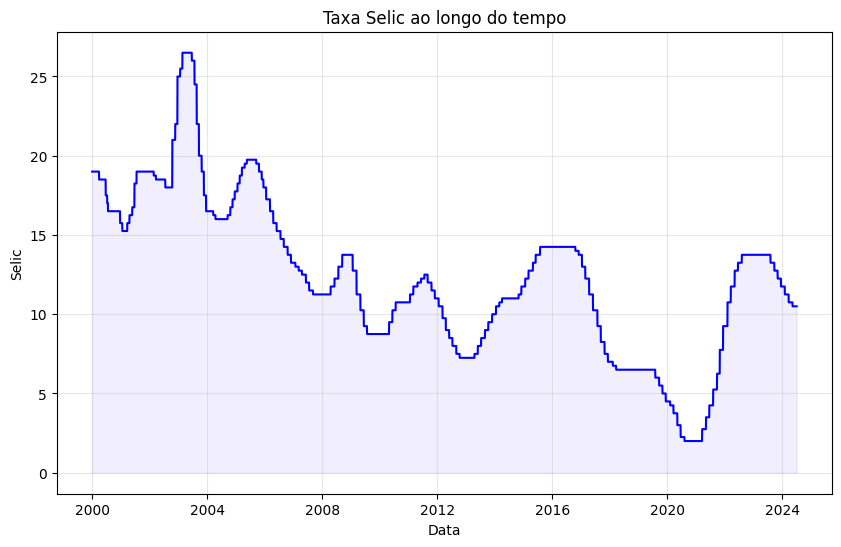

In [7]:
#visualizar isso em um gráfico de dispersão com o seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Selic', data=selic, color ='blue')
#preencher o gráfico com cor
plt.fill_between(selic['Date'], selic['Selic'], color='mediumslateblue', alpha=0.1)
plt.title('Taxa Selic ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Selic')
plt.grid(True, alpha = 0.3)
plt.show()

### Gráfico interativo com plotly

In [8]:
#vou montar um gráfico interativo com o plotly
fig = px.scatter(selic, x='Date', y='Selic', color='Selic', title='Taxa Selic ao longo do tempo', template='plotly_dark',
              width=1000,
              height=600)

# Configurar o layout do gráfico
fig.update_layout(xaxis_rangeslider_visible=True)
fig.update_traces(mode='markers+lines')
fig.update_layout(showlegend=False)
fig.update_layout(yaxis_title='Selic')
fig.update_layout(xaxis_title='Data')
fig.update_layout(title_font=dict(size=18))
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')
fig.show()


In [ ]:
# Salva o gráfico como um arquivo HTML
fig.write_html("/content/grafico_interativo.html")


In [ ]:
from google.colab import files
files.download('/content/grafico_interativo.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Vou acrescentar a coluna variação da selic

In [9]:
#vou calcular a variação
selic['Variação'] = selic['Selic'].pct_change()

In [10]:
print(selic)

           Date  Selic  Variação
0    2000-01-01   19.0       NaN
1    2000-01-02   19.0       0.0
2    2000-01-03   19.0       0.0
3    2000-01-04   19.0       0.0
4    2000-01-05   19.0       0.0
...         ...    ...       ...
8944 2024-06-27   10.5       0.0
8945 2024-06-28   10.5       0.0
8946 2024-06-29   10.5       0.0
8947 2024-06-30   10.5       0.0
8948 2024-07-01   10.5       0.0

[8949 rows x 3 columns]


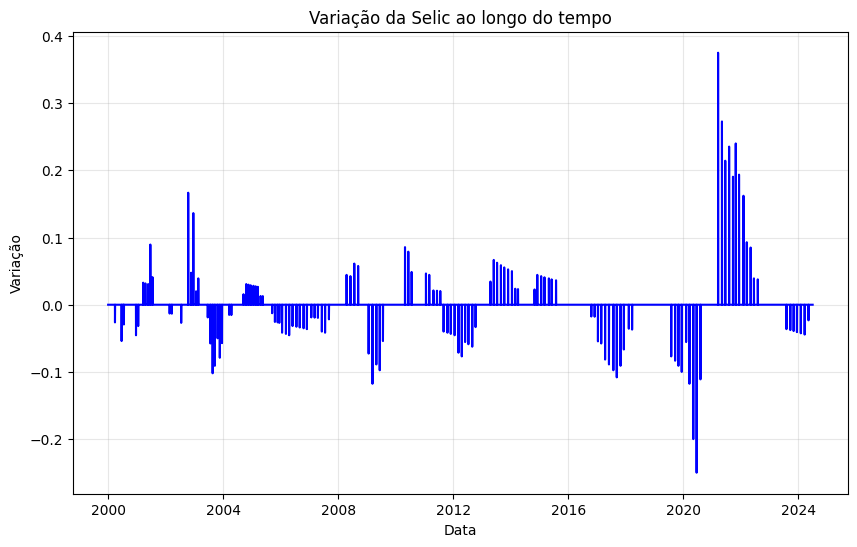

In [13]:
#visualizar a Variação da Selic ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Variação', data=selic, color ='blue')
plt.title('Variação da Selic ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Variação')
plt.grid(True, alpha = 0.3)
plt.show()



---



### Vou buscar os dados da inflação brasileira no período

In [20]:
import gspread

In [21]:
url = "https://docs.google.com/spreadsheets/d/1lKoL4yJhY6IkqCL2qkzKQ5dE8py-GTN9/export?format=csv"
dados = pd.read_csv(url)

In [22]:
#colocar a coluna Date como datetime
dados['Date'] = pd.to_datetime(dados['Date'])
#vou apagar o localizado na linha 0
dados.drop(dados.index[0], inplace=True)
print(dados)

          Date  acumul.  variaç.
1   1994-03-01  3417.39    42.75
2   1994-04-01  3828.49    42.68
3   1994-05-01  4331.19    44.03
4   1994-06-01  4922.60    47.43
5   1994-07-01  4005.08     6.84
..         ...      ...      ...
360 2024-02-01     4.50     0.83
361 2024-03-01     3.93     0.16
362 2024-04-01     3.69     0.38
363 2024-05-01     3.93     0.46
364 2024-06-01     4.23     0.21

[364 rows x 3 columns]


In [23]:
# Filtrar os dados a partir de janeiro de 2000
dados_filtrados = dados[dados['Date'] >= '2000-01-01']
print(dados_filtrados)

          Date  acumul.  variaç.
71  2000-01-01     8.85     0.62
72  2000-02-01     7.86     0.13
73  2000-03-01     6.92     0.22
74  2000-04-01     6.77     0.42
75  2000-05-01     6.47     0.01
..         ...      ...      ...
360 2024-02-01     4.50     0.83
361 2024-03-01     3.93     0.16
362 2024-04-01     3.69     0.38
363 2024-05-01     3.93     0.46
364 2024-06-01     4.23     0.21

[294 rows x 3 columns]


### Visualizar os dados de inflação no período


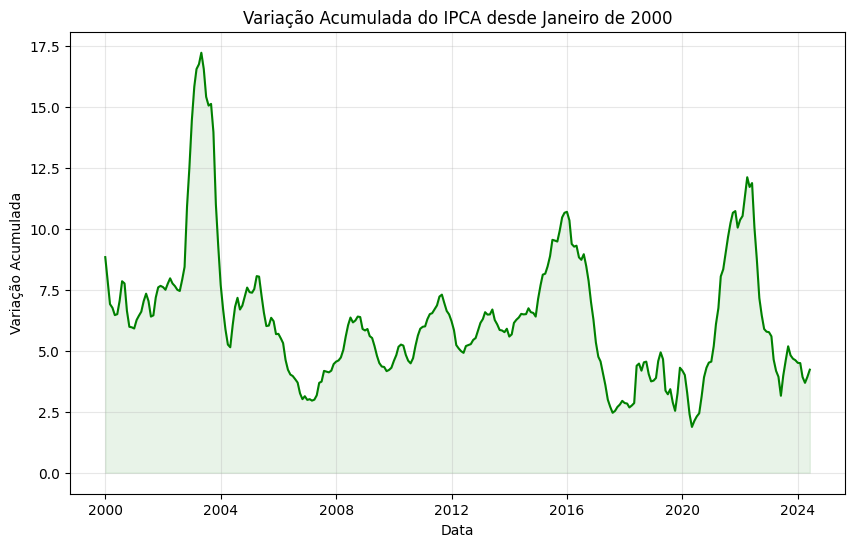

In [24]:
# Visualizar os dados com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_filtrados, x='Date', y='acumul.', color = 'green')
#vou preencher o gráfico
plt.fill_between(dados_filtrados['Date'], dados_filtrados['acumul.'], color='forestgreen', alpha=0.1)

plt.title('Variação Acumulada do IPCA desde Janeiro de 2000')
plt.xlabel('Data')
plt.ylabel('Variação Acumulada')

plt.grid(True, alpha = 0.3)
plt.show()

### Gráfico interativo:

In [25]:
#vou criar um gráfico interativo como o anterior
fig1 = px.scatter(dados_filtrados, x='Date', y='acumul.', color='acumul.', title='Variação Acumulada do IPCA, desde Janeiro de 2000', template='plotly_dark',
              width=1000,
              height=600,
              color_continuous_scale=['gray', 'green']
                  )

#configurar para cor da dispersão em verde e fundo dark
fig1.update_traces(mode='markers+lines')
fig1.update_layout(showlegend=False)
fig1.update_layout(yaxis_title='Variação Acumulada')
fig1.update_layout(xaxis_title='Data')
fig1.update_layout(title_font=dict(size=18))
fig1.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig1.update_yaxes(showline=True, linewidth=1, linecolor='black')
fig1.update_layout(xaxis_rangeslider_visible=True)
fig1.update_layout(hovermode='x')
fig1.show()

### Visualizar Selic vs. Inflação no mesmo gráfico:

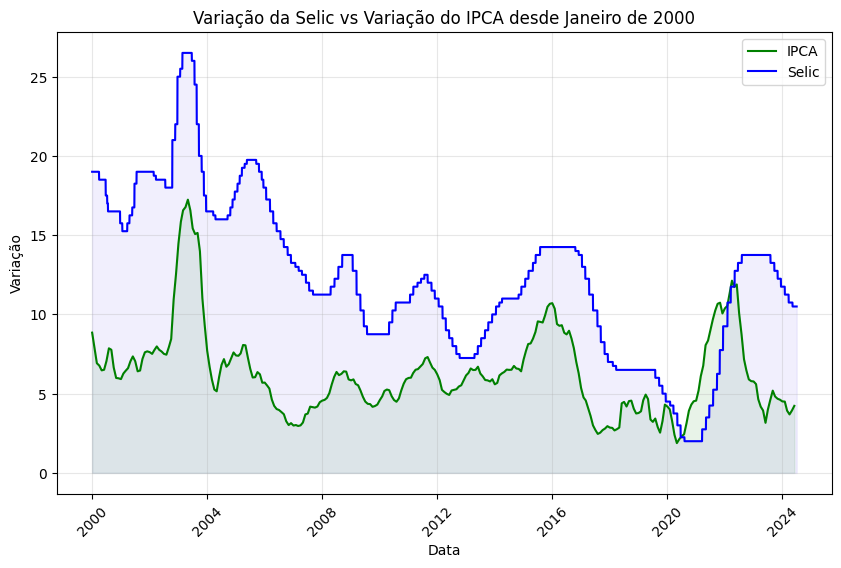

In [70]:
#vou visualizar os dados da inflação vs. a selic
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_filtrados, x='Date', y='acumul.', color = 'green', label = "IPCA")
sns.lineplot(data=selic, x='Date', y='Selic', color = 'blue', label = "Selic")
plt.title('Variação da Selic vs Variação do IPCA desde Janeiro de 2000')
plt.xlabel('Data')
plt.ylabel('Variação')
plt.xticks(rotation=45)
#vou dar uma embelezada no gráfico
plt.fill_between(dados_filtrados['Date'], dados_filtrados['acumul.'], color='forestgreen', alpha=0.1)
plt.fill_between(selic['Date'], selic['Selic'], color='mediumslateblue', alpha=0.1)
plt.grid(True, alpha = 0.3)
plt.legend()
plt.show()

### Visualizar os dados da variação da inflação ao longo do tempo

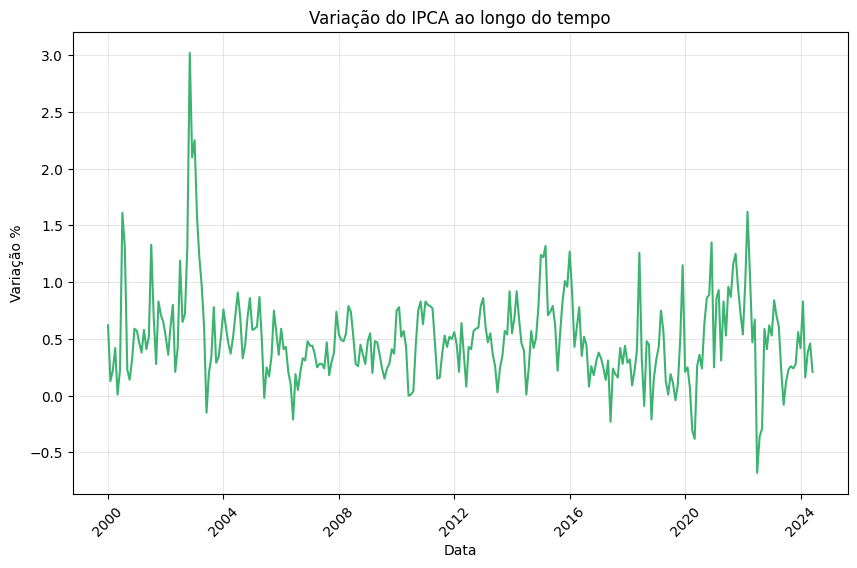

In [28]:
# Visualizar os dados com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_filtrados, x='Date', y='variaç.', color = 'mediumseagreen')

plt.title('Variação do IPCA ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Variação %')
plt.xticks(rotation=45)
plt.grid(True, alpha = 0.3)
plt.show()

### Colocar as duas variações no mesmo gráfico

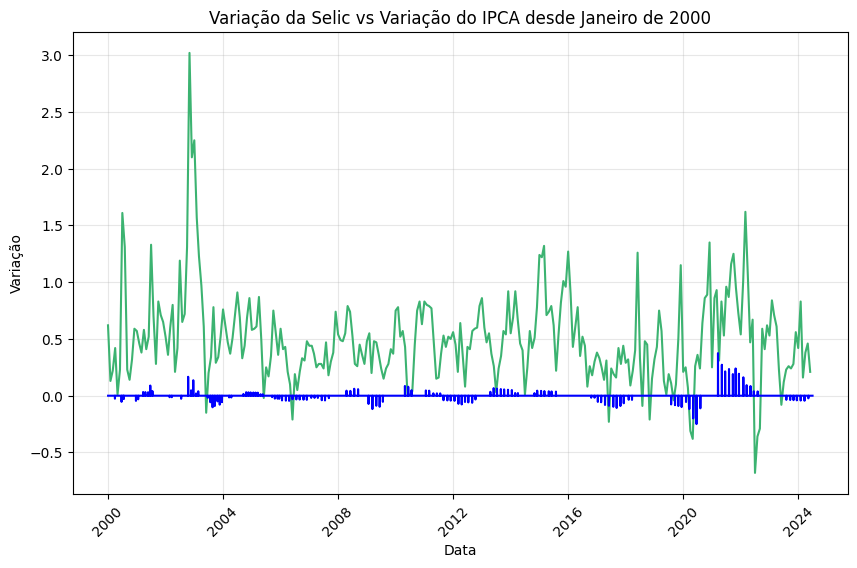

In [29]:
#vou visualizar o gráfico da variação da selic com a variação da inflação
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_filtrados, x='Date', y='variaç.', color = 'mediumseagreen')
sns.lineplot(data=selic, x='Date', y='Variação', color = 'blue')
plt.title('Variação da Selic vs Variação do IPCA desde Janeiro de 2000')
plt.xlabel('Data')
plt.ylabel('Variação')
plt.xticks(rotation=45)
plt.grid(True, alpha = 0.3)
plt.show()



---



### Analisar a correlação linear entre as duas variáveis

In [30]:
#correlação entre a taxa selic e variação do ipca
corr0 = selic['Selic'].corr(dados_filtrados['variaç.'])
print("Coeficiente de correlação:", corr0)

#correlação entre a variação da selic e variação do ipca
corr1 = selic['Variação'].corr(dados_filtrados['variaç.'])
print("Coeficiente de correlação:", corr1)

Coeficiente de correlação: 0.09303415702479949
Coeficiente de correlação: -0.03239645107893443


### Vou avaliar a correlação ao longo do tempo entre os dois

In [31]:
# Função para calcular correlações com lags
def calcular_correlacoes_lags(selic_variacao, ipca_variacao, max_lag):
    lags = []
    corr_values = []

    for lag in range(max_lag + 1):
        lagged_selic = selic_variacao.shift(lag)
        corr = lagged_selic.corr(ipca_variacao)
        lags.append(lag)
        corr_values.append(corr)

    return lags, corr_values

In [32]:
# Calcular correlações para até 24 meses de atraso
max_lag = 24
lags, corr_values = calcular_correlacoes_lags(selic['Variação'], dados_filtrados['variaç.'], max_lag)

In [33]:
# Calcular correlações para até 12 meses de atraso
max_lag = 24
lags, corr_values = calcular_correlacoes_lags(selic['Variação'], dados_filtrados['variaç.'], max_lag)

# Criar um DataFrame para visualizar os resultados
lag_corr_df = pd.DataFrame({'Lag (meses)': lags, 'Correlação': corr_values})

print(lag_corr_df)

    Lag (meses)  Correlação
0             0   -0.032396
1             1   -0.039352
2             2    0.012117
3             3    0.010150
4             4   -0.014163
5             5   -0.010261
6             6    0.067227
7             7    0.051978
8             8    0.025712
9             9    0.041624
10           10   -0.033767
11           11    0.016458
12           12    0.000324
13           13   -0.024728
14           14    0.011021
15           15    0.005129
16           16    0.000947
17           17   -0.111869
18           18   -0.042141
19           19   -0.087349
20           20   -0.084489
21           21   -0.030760
22           22   -0.037135
23           23   -0.002549
24           24    0.081223


### Vou visualizar esse dado da correlação lag

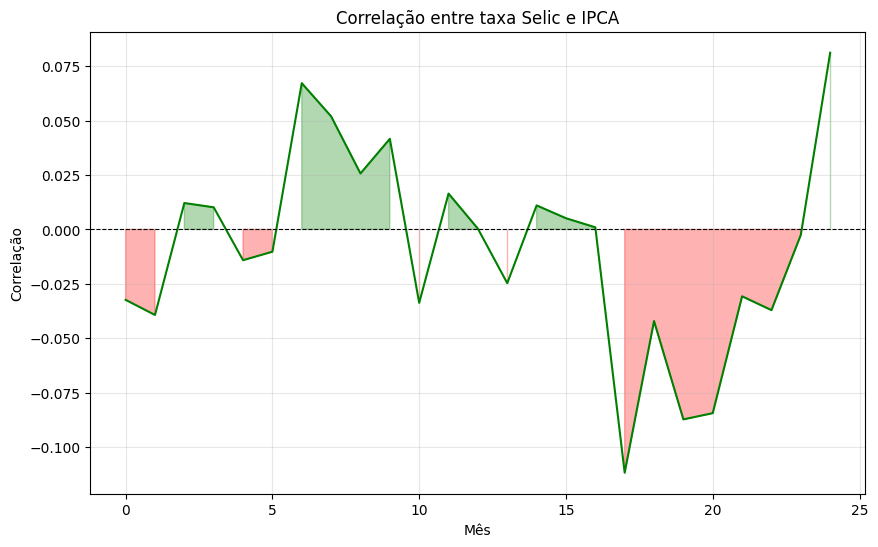

In [34]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=lag_corr_df, x='Lag (meses)', y='Correlação', color='green')

# Preencher áreas positivas e negativas com cores diferentes
plt.fill_between(lag_corr_df['Lag (meses)'], lag_corr_df['Correlação'], where=(lag_corr_df['Correlação'] >= 0), color='green', alpha=0.3)
plt.fill_between(lag_corr_df['Lag (meses)'], lag_corr_df['Correlação'], where=(lag_corr_df['Correlação'] < 0), color='red', alpha=0.3)

# Adicionar linha no y=0
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Adicionar títulos e labels
plt.title('Correlação entre taxa Selic e IPCA')
plt.xlabel('Mês')
plt.ylabel('Correlação')
plt.grid(True, alpha=0.3)

# Exibir o gráfico
plt.show()

### Veja o que acontece no Brasil:
### - Um aumento da taxa de juros básica na maior parte dos próximos períodos gera uma queda na inflação. Mas essa queda não é perfeita e muito menos contínua no caso brasileiro.

### - Resumo do que ocorre: Ela responde de imediato, mas depois para e, então, apenas após vários meses ela volta a responder e continua respondendo à variação da Selic. Dessa forma, um aumento na Selic hoje deve fazer a inflação desacelerar nos próximos dois ou três períodos, mas após isso o seu efeito fica inconstante e só tende a voltar após o 10° mês! O pico de queda da inflação após um aumento da Selic, nesse caso, ocorreu apenas no 18° mês após a queda.

### Lembre-se: correlação não implica causalidade. Mas sabe-se que a inflação tende a responder negativamente a direção de variação da taxa básica de juros.

### Mais a frente, vou realizar uma análise do caso estadunidense, para mostrar que lá ocorre um padrão mais previsível dado a teoria econômica. Ou seja, um aumento dos juros gera tendência de queda do índice de inflação em uma economia.

### Vou dividir os dados e ver se a situação de má transmissão da política monetária vem diminuindo no Brasil

In [35]:
#vou usar o merged para combinar os dataframes selic com o dados_filtrados a partir da coluna de datas (Date)
merged_df = pd.merge(selic, dados_filtrados, on='Date')

In [36]:
print(merged_df)

          Date  Selic  Variação  acumul.  variaç.
0   2000-01-01  19.00       NaN     8.85     0.62
1   2000-02-01  19.00  0.000000     7.86     0.13
2   2000-03-01  19.00  0.000000     6.92     0.22
3   2000-04-01  18.50  0.000000     6.77     0.42
4   2000-05-01  18.50  0.000000     6.47     0.01
..         ...    ...       ...      ...      ...
289 2024-02-01  11.25 -0.042553     4.50     0.83
290 2024-03-01  11.25  0.000000     3.93     0.16
291 2024-04-01  10.75  0.000000     3.69     0.38
292 2024-05-01  10.75  0.000000     3.93     0.46
293 2024-06-01  10.50  0.000000     4.23     0.21

[294 rows x 5 columns]


In [37]:
# Crio os DataFrames filtrados
df_i = merged_df[(merged_df['Date'] >= '2000-01-01') & (merged_df['Date'] <= '2010-12-1')]
df_f = merged_df[(merged_df['Date'] >= '2010-01-01') & (merged_df['Date'] <= '2024-06-1')]

In [38]:
df_i

,Date,Selic,Variação,acumul.,variaç.
0,2000-01-01,19.00,NaN,8.85,0.62
1,2000-02-01,19.00,0.0,7.86,0.13
2,2000-03-01,19.00,0.0,6.92,0.22
3,2000-04-01,18.50,0.0,6.77,0.42
4,2000-05-01,18.50,0.0,6.47,0.01
...,...,...,...,...,...
127,2010-08-01,10.75,0.0,4.49,0.04
128,2010-09-01,10.75,0.0,4.70,0.45
129,2010-10-01,10.75,0.0,5.20,0.75
130,2010-11-01,10.75,0.0,5.63,0.83


In [ ]:
df_f

,Date,Selic,Variação,acumul.,variaç.
120,2010-01-01,8.75,0.000000,4.59,0.75
121,2010-02-01,8.75,0.000000,4.83,0.78
122,2010-03-01,8.75,0.000000,5.17,0.52
123,2010-04-01,8.75,0.000000,5.26,0.57
124,2010-05-01,9.50,0.000000,5.22,0.43
...,...,...,...,...,...
289,2024-02-01,11.25,-0.042553,4.50,0.83
290,2024-03-01,11.25,0.000000,3.93,0.16
291,2024-04-01,10.75,0.000000,3.69,0.38
292,2024-05-01,10.75,0.000000,3.93,0.46


### Vou calcular a correlação existente entre 2000 e 2010:

In [ ]:
# Função para calcular correlações com lags
def calcular_correlacoes_lags(selic_variacao, ipca_variacao, max_lag):
    lags = []
    corr_values = []

    for lag in range(max_lag + 1):
        lagged_selic = selic_variacao.shift(lag)
        combined_data = pd.concat([lagged_selic, ipca_variacao], axis=1).dropna()
        corr = combined_data.iloc[:, 0].corr(combined_data.iloc[:, 1])
        lags.append(lag)
        corr_values.append(corr)

    return lags, corr_values

In [ ]:
# Ajustar as colunas para as variáveis de interesse
selic_variacao = df_i['Variação']
ipca_variacao = df_i['variaç.']

# Calcular correlações para o período completo
max_lag = 24
lags, corr_values = calcular_correlacoes_lags(selic_variacao, ipca_variacao, max_lag)

# Criar DataFrame para visualizar os resultados
lag_corr_df = pd.DataFrame({'Lag (meses)': lags, 'Correlação': corr_values})

print("Correlação com lag:")
print(lag_corr_df)

Correlação com lag:
    Lag (meses)  Correlação
0             0    0.151056
1             1    0.070405
2             2    0.099741
3             3    0.067163
4             4    0.043674
5             5    0.048410
6             6    0.011812
7             7    0.019224
8             8    0.019788
9             9    0.035672
10           10    0.062043
11           11    0.055466
12           12    0.055409
13           13    0.064210
14           14    0.014761
15           15    0.077453
16           16    0.051742
17           17    0.034457
18           18   -0.045691
19           19   -0.002062
20           20    0.009447
21           21    0.011079
22           22   -0.004744
23           23   -0.058048
24           24   -0.046982


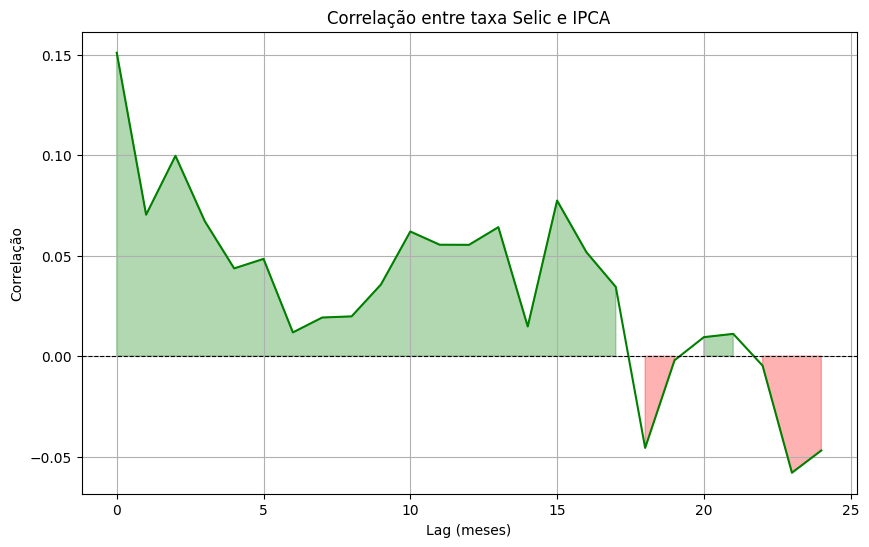

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=lag_corr_df, x='Lag (meses)', y='Correlação', color='green')

# Preencher áreas positivas e negativas com cores diferentes
plt.fill_between(lag_corr_df['Lag (meses)'], lag_corr_df['Correlação'],
                 where=(lag_corr_df['Correlação'] >= 0), color='green', alpha=0.3)
plt.fill_between(lag_corr_df['Lag (meses)'], lag_corr_df['Correlação'],
                 where=(lag_corr_df['Correlação'] < 0), color='red', alpha=0.3)

# Adicionar linha no y=0
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Adicionar títulos e labels
plt.title('Correlação entre taxa Selic e IPCA')
plt.xlabel('Lag (meses)')
plt.ylabel('Correlação')
plt.grid(True)

# Exibir o gráfico
plt.show()

### Veja que o efeito não parece adequado para o objetivo da política monetária.
### O efeito de queda da inflação só vem após vários meses -- apenas após o 18° mês! antes disso a correlação foi positiva, ou seja, a política monetária (aumento dos juros, do exemplo) não conseguiu levar a inflação a cair nos meses seguintes a aplicação dessa política. Apenas no médio-prazo isso ocorreu com alguma força. Sim: a economia é deficiente para absorver os efeitos da política monetária.

### Vou ver se os resultados melhoram entre 2010 e 2024:

In [ ]:
# Ajustar as colunas para as variáveis de interesse
selic_variacao = df_f['Variação']
ipca_variacao = df_f['variaç.']

# Calcular correlações para o período completo
max_lag = 24
lags, corr_values = calcular_correlacoes_lags(selic_variacao, ipca_variacao, max_lag)

# Criar DataFrame para visualizar os resultados
lag_corr_df = pd.DataFrame({'Lag (meses)': lags, 'Correlação': corr_values})

print("Correlação com lag:")
print(lag_corr_df)

Correlação com lag:
    Lag (meses)  Correlação
0             0    0.117395
1             1    0.114168
2             2    0.092804
3             3    0.062757
4             4   -0.060917
5             5    0.075381
6             6    0.099683
7             7    0.079376
8             8    0.145044
9             9    0.194835
10           10    0.063900
11           11    0.029196
12           12   -0.109426
13           13   -0.027682
14           14    0.021855
15           15   -0.062509
16           16   -0.131544
17           17    0.129294
18           18   -0.008726
19           19   -0.003028
20           20    0.069314
21           21   -0.061729
22           22    0.003436
23           23    0.021085
24           24    0.004841


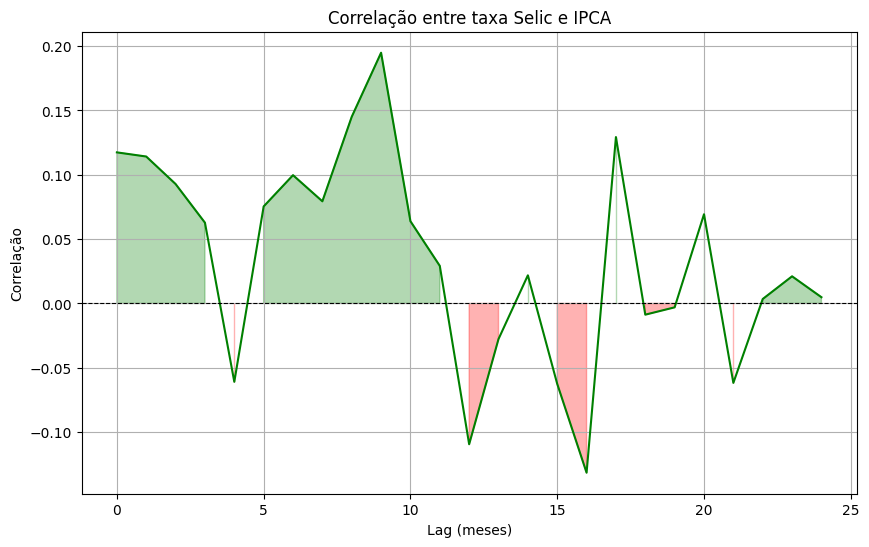

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=lag_corr_df, x='Lag (meses)', y='Correlação', color='green')

# Preencher áreas positivas e negativas com cores diferentes
plt.fill_between(lag_corr_df['Lag (meses)'], lag_corr_df['Correlação'],
                 where=(lag_corr_df['Correlação'] >= 0), color='green', alpha=0.3)
plt.fill_between(lag_corr_df['Lag (meses)'], lag_corr_df['Correlação'],
                 where=(lag_corr_df['Correlação'] < 0), color='red', alpha=0.3)

# Adicionar linha no y=0
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Adicionar títulos e labels
plt.title('Correlação entre taxa Selic e IPCA')
plt.xlabel('Lag (meses)')
plt.ylabel('Correlação')
plt.grid(True)

# Exibir o gráfico
plt.show()

### As maiores quedas, dado a implementação de aumentos da taxa de juros básica, foi depois do 10° mês da aplicação. Não há o que acrescentar: a política monetária no Brasil tem dificuldade de ser transmitida ao longo da economia. No contexto nacional.

### Perceba: isso não nega a eficácia da política monetária brasileira. O por que disso tem haver com os resultados obtidos pela política do Tripé Macroeconômico, que é mal-implementada no Brasil. Mesmo sendo implementada em parte no Brasil, já que um desses "pés" da política não é bem aplicado, -- a responsabilidade fiscal -- mas continua obtendo bons resultados, dado a queda estrutural da inflação do país ao longo do tempo.



---



## Agora sim vou comparar os resultados brasileiros com o dos EUA

### Carregar os dados da inflação nos EUA:

In [39]:
# URL do arquivo CSV
url1 = "https://docs.google.com/spreadsheets/d/1qV5kNoL0RRmG6vpedDVTA4N0FkSysh3rqCu9RkjT7dk/export?format=csv"
# Carregando o CSV em um DataFrame
dados1 = pd.read_csv(url1)

In [40]:
# Vou colocar a coluna data em datetime
dados1['data'] = pd.to_datetime(dados1['data'], dayfirst=True)
print(dados1)

          data  inflation
0   2001-01-01        3.7
1   2001-02-01        3.5
2   2001-03-01        2.9
3   2001-04-01        3.3
4   2001-05-01        3.6
..         ...        ...
277 2024-02-01        3.2
278 2024-03-01        3.5
279 2024-04-01        3.4
280 2024-05-01        3.3
281 2024-06-01        3.0

[282 rows x 2 columns]


### Inflação dos EUA ao longo do tempo

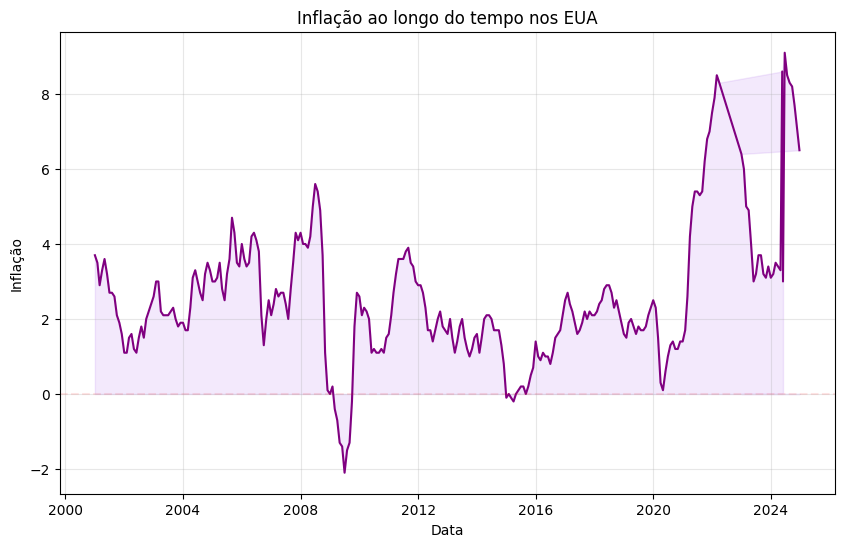

In [65]:
#vou colocar o gráfico da inflation vs. data
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados1, x='data', y='inflation', color = 'purple')
#vou preencher o gráfico
plt.fill_between(dados1['data'], dados1['inflation'], color='blueviolet', alpha=0.1)
#vou colocar uma linha costante no horizontal em y 0
plt.axhline(y=0, color='red', alpha = 0.1, linestyle='--')
plt.title('Inflação ao longo do tempo nos EUA')
plt.xlabel('Data')
plt.ylabel('Inflação')
plt.grid(True, alpha = 0.3)
plt.show()

In [43]:
#vou calcular a variação da inflação
dados1['Variação'] = dados1['inflation'].pct_change()

### Veja a variação da inflação ao longo do tempo lá:

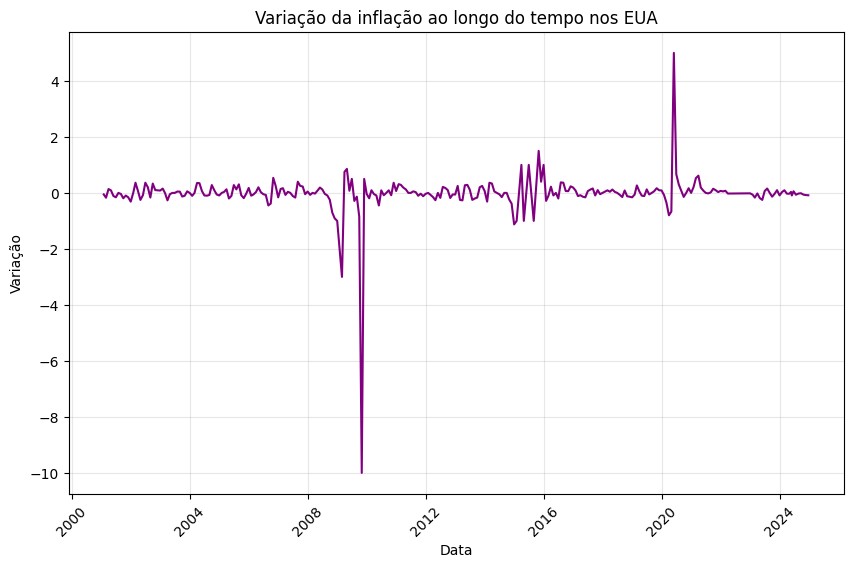

In [66]:
#vou visualizar a variação da inflação ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados1, x='data', y='Variação', color = 'purple')
plt.title('Variação da inflação ao longo do tempo nos EUA')
plt.xlabel('Data')
plt.ylabel('Variação')
plt.xticks(rotation=45)
plt.grid(True, alpha = 0.3)
plt.show()

### Vou carregar os dados relativos às taxas de juros básicas estadunidense ao longo do tempo

In [46]:
url2 = "https://docs.google.com/spreadsheets/d/12gSZyTBOehCV0sSJqiY53usFM_gPylVfuGAtkrYPl1A/export?format=csv"
dados2 = pd.read_csv(url2)

In [47]:
print(dados2)

           data  taxa  taxa1
0    2000-01-01  5,45   5.45
1    2000-02-01  5,73   5.73
2    2000-03-01  5,85   5.85
3    2000-04-01  6,02   6.02
4    2000-05-01  6,27   6.27
..          ...   ...    ...
289  2024-02-01  5,33   5.33
290  2024-03-01  5,33   5.33
291  2024-04-01  5,33   5.33
292  2024-05-01  5,33   5.33
293  2024-06-01  5,33   5.33

[294 rows x 3 columns]


In [48]:
#vou colocar a coluna data como datetime
dados2['data'] = pd.to_datetime(dados2['data'])

### Visualizar o juros básicos ao longo do tempo no EUA:

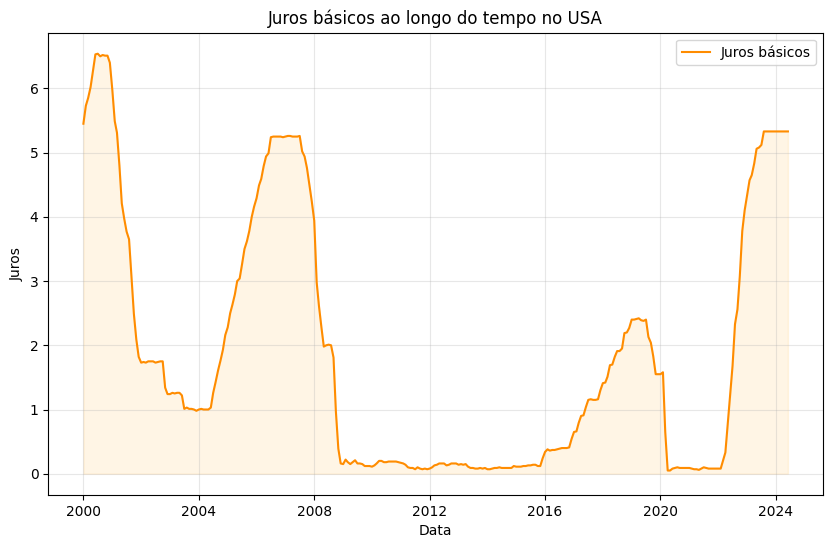

In [56]:
#vou visualizar a coluna taxa1 e data
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados2, x='data', y='taxa1', color = 'darkorange', label = 'Juros básicos')
plt.title('Juros básicos ao longo do tempo no USA')
plt.xlabel('Data')
plt.ylabel('Juros')
#vou preencher
plt.fill_between(dados2['data'], dados2['taxa1'], color='orange', alpha=0.1)
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

### Colocar os dois em um gráfico:

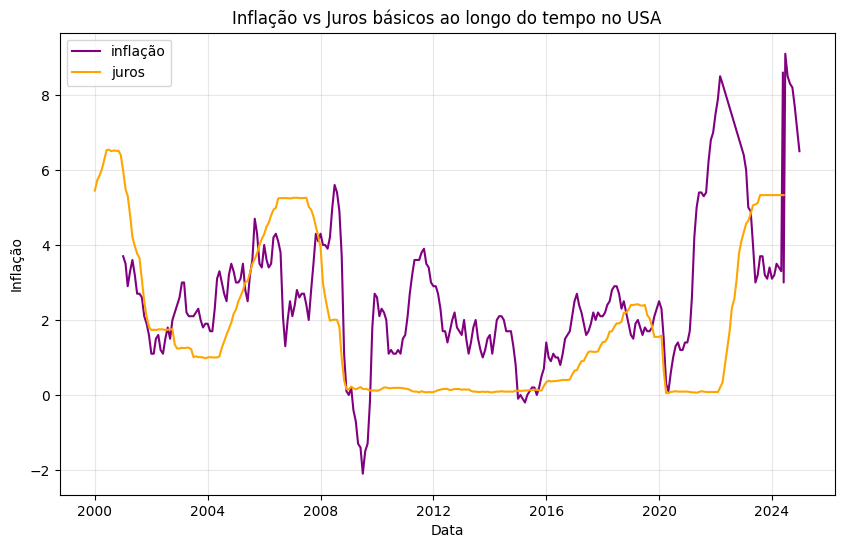

In [71]:
#vou colocar a inflation vs. taxa básica de juros em um gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados1, x='data', y='inflation', color = 'purple', label = 'inflação')
sns.lineplot(data=dados2, x='data', y='taxa1', color = 'orange',  label ='juros')


plt.title('Inflação vs Juros básicos ao longo do tempo no USA')
plt.xlabel('Data')
plt.ylabel('Inflação')
plt.grid(True, alpha = 0.3)
plt.legend()
plt.show()


In [53]:
#vou estudar a correlação entre taxa1 e inflation
corr2 = dados2['taxa1'].corr(dados1['inflation'])
print("Coeficiente de correlação:", corr2)

Coeficiente de correlação: 0.012958873008054657


### Correlação baixa

### Vou calcular a correlação com defasagem (o efeito de uma aumento na taxa de juros só é sentido mais a frente, com defasagem)

In [58]:
#vou criar um dataframe combinando data, inflation e taxa1
data_combined2 = pd.DataFrame({
    'Inflation': dados1['inflation'],
    'Taxa1': dados2['taxa1']
})

In [59]:
#vou apagar os valores nan
data_combined2.dropna(inplace=True)

In [ ]:
# Ajustar o modelo ARIMA (p, d, q)
model1 = sm.tsa.ARIMA(data_combined2['Inflation'], order=(1, 1, 1), exog=data_combined2['Taxa1'])
results1 = model1.fit()

# Resumo do modelo
print(results1.summary())

                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  282
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -150.773
Date:                Tue, 23 Jul 2024   AIC                            309.547
Time:                        17:27:56   BIC                            324.100
Sample:                             0   HQIC                           315.383
                                - 282                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Taxa1         -0.2257      0.135     -1.671      0.095      -0.490       0.039
ar.L1          0.1697      0.124      1.363      0.173      -0.074       0.414
ma.L1          0.3162      0.117      2.691      0.0

### Os resultados dessa modelagem ARIMA a partir do qual buscou-se ver o quanto a variável taxa de juros básica explica um pouco mais a variável inflação, mostra que ela explica mais a inflação do que no caso brasileiro.

### É preciso lembrar que a inflação é explicada por diversos fatores, não apenas a taxa de juros básicas de uma economia.

In [60]:
# Função para calcular correlações com lags
def calcular_correlacoes_lags(inflation, taxa1, max_lag):
    lags = []
    corr_values = []

    for lag in range(max_lag + 1):
        lagged_taxa1 = taxa1.shift(lag)
        corr = inflation.corr(lagged_taxa1)
        lags.append(lag)
        corr_values.append(corr)

    return lags, corr_values

In [61]:
# Chamando a função
lags, corr_values = calcular_correlacoes_lags(data_combined2['Inflation'], data_combined2['Taxa1'], max_lag=24)

# Exibindo os resultados
lag_correlation_df0 = pd.DataFrame({'Lag': lags, 'Correlation': corr_values})
print(lag_correlation_df0)

    Lag  Correlation
0     0     0.012959
1     1    -0.013816
2     2    -0.036291
3     3    -0.054872
4     4    -0.075423
5     5    -0.097437
6     6    -0.116028
7     7    -0.129257
8     8    -0.139473
9     9    -0.145407
10   10    -0.145170
11   11    -0.141026
12   12    -0.133291
13   13    -0.121622
14   14    -0.109223
15   15    -0.097311
16   16    -0.085417
17   17    -0.072393
18   18    -0.058609
19   19    -0.046571
20   20    -0.035410
21   21    -0.023412
22   22    -0.013750
23   23    -0.003618
24   24     0.005838


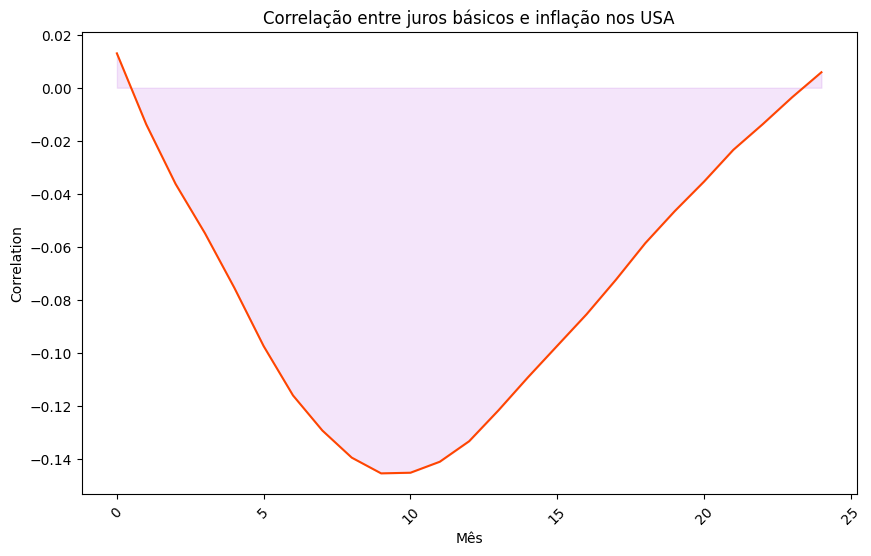

In [73]:
#vou visualizar os dados do dataframe lag_correlatio_df0
plt.figure(figsize=(10, 6))
sns.lineplot(data=lag_correlation_df0, x='Lag', y='Correlation', color = 'orangered')
#vou preencher
plt.fill_between(lag_correlation_df0['Lag'], lag_correlation_df0['Correlation'], color='darkviolet', alpha=0.1)
plt.title('Correlação entre juros básicos e inflação nos USA')
plt.xlabel('Mês')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

### Nos EUA, um aumento da taxa de juros básica gera uma resposta de tendência permanente da inflação (ela cai e continua caindo a partir do 2° mês chegando ao pico de queda no 10° mês). Após esse tempo o efeito inverso na inflação tende a ser menor, mas ainda não cessa. Tal efeito parece cessarapenas após 24 mês (2 anos) do aumento dos juros.

## **Conclusão:**
### Deve-se investigar as causas dessa deficiência de transmissão da política monetária na economima brasileira e resolver o problema, de modo que o país consiga após isso usufruir dos efeitos da política monetária em sua plenitude. Isso implicará em melhora do funcionamento da economia nacional.

####**END.**